# Chapter 6 Lecture Worksheet - Classification

## Learning Objectives
* Recognize situations where a simple classifier would be appropriate for making predictions.
* Explain the k-nearest neighbour classification algorithm.
* Interpret the output of a classifier.
* Compute, by hand, the distance between points when there are two attributes.
* Describe what a training data set is and how it is used in classification.
* In a dataset with two attributes, perform k-nearest neighbour classification in R using caret::train(method = "knn", ...) to predict the class of a single new observation.

In [21]:
library(repr)      # options() to change the plot sizes
library(tidyverse) 

# Part 1 - Breast cancer dataset
We will work with the breast cancer data from this week's pre-reading. Load the appropriate packages and the "clean-wdbc-data.csv" dataset into the notebook. 

In [22]:
bcDat <- read_csv("data/clean-wdbc-data.csv")

Parsed with column specification:
cols(
  ID = col_integer(),
  Class = col_character(),
  Radius = col_double(),
  Texture = col_double(),
  Perimeter = col_double(),
  Area = col_double(),
  Smoothness = col_double(),
  Compactness = col_double(),
  Concavity = col_double(),
  Concave_points = col_double(),
  Symmetry = col_double(),
  Fractal_dimension = col_double()
)


## Question 1
The first six rows of the breast cancer data table is shown below. 

In [23]:
# hidden cell 
head(bcDat)

ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
842302,M,1.8850310,-1.35809849,2.3015755,1.9994782,1.3065367,2.6143647,2.1076718,2.2940576,2.7482041,1.9353117
842517,M,1.8043398,-0.36887865,1.5337764,1.8888270,-0.3752817,-0.4300658,-0.1466200,1.0861286,-0.2436753,0.2809428
84300903,M,1.5105411,-0.02395331,1.3462906,1.4550043,0.5269438,1.0819801,0.8542223,1.9532817,1.1512420,0.2012142
84348301,M,-0.2812170,0.13386631,-0.2497196,-0.5495377,3.3912907,3.8899747,1.9878392,2.1738732,6.0407261,4.9306719
84358402,M,1.2974336,-1.46548091,1.3373627,1.2196511,0.2203623,-0.3131190,0.6126397,0.7286181,-0.8675896,-0.3967505
843786,M,-0.1653528,-0.31356043,-0.1149083,-0.2441054,2.0467119,1.7201029,1.2621327,0.9050914,1.7525273,2.2398308


We want to predict the variable "area" for a new observation. True or False: Is this a classification problem?

> Your answer goes here.


## Question 2
Just by looking at the scatterplot below, how would you classify an observation with symmetry 1 and radius 0.5?  
a) Benign 
b) Malignant

> Your answer goes here.

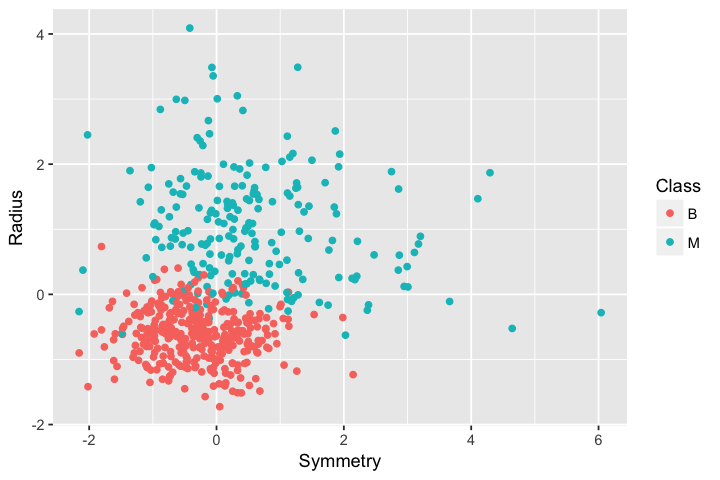

In [24]:
# Change plot size to 6 x 4
options(repr.plot.width=6, repr.plot.height=4)

bcDat %>%  
  ggplot(aes(x=Symmetry, y=Radius, color = Class)) + 
  geom_point() +
  scale_x_continuous(name = "Symmetry") +
  scale_y_continuous(name = "Radius")

## Question 3:
Using R as a calculator and the formula below, compute the distance between the first and second observation in the breast cancer dataset using attributes symmetry and radius.

* We want to find the distance between the first and second observation in the breast cancer dataset using 2 attributes: symmetry and radius.

* Recall we can calculate the distance between two points using the following formula: 
$$Distance = \sqrt{(x_a -x_b)^2 + (y_a - y_b)^2}$$

* Point $a$, $(x_a, y_a)$, has coordinates $(2.75, 1.89)$ and point $b$, $(x_b, y_b)$, has coordinates $(-0.24, 1.80)$.

In [25]:
(xa <- filter(bcDat, row_number()==1) %>% # selecting first observation from bcDat 
     select(Symmetry) %>%                 # selecting the column Symmetry 
     unlist())                            # we want the numeric value only               

(ya <- filter(bcDat, row_number()==1)  %>%  
    select(Radius) %>%
    unlist())

(xb <- filter(bcDat, row_number() == 2) %>%  
    select(Symmetry) %>%
    unlist())

(yb <- filter(bcDat, row_number() == 2) %>%
    select(Radius) %>%
    unlist())

Symmetry 
2.748204

Radius 
1.885031

Symmetry 
-0.2436753

Radius 
1.80434

In [1]:
# Your answer goes here.

## Question 4
We want to calculate the distance between the first and second observation in the breast cancer dataset using 3 attributes: symmetry, radius and concavity. 

Notice that point a, $(x_a, y_a, z_a)$, has coordinates $(2.75, 1.89, 2.11)$ and point $b$, $(x_b, y_b, z_b)$, has coordinates $(-0.24, 1.80, -0.15)$

In [27]:
(za <- filter(bcDat, row_number() == 1) %>% # selecting first observation from bcDat 
    select(Concavity)%>%                    # selecting the column Concavity (third coordinate of point a) 
    unlist())
 
(zb <- filter(bcDat, row_number() ==2) %>%
    select(Concavity)%>%
    unlist())

Concavity 
 2.107672

Concavity 
 -0.14662

### Part a) 
Using R as a calculator, calculate the distance between the first and second observation in the breast cancer dataset using 3 attributes: symmetry, radius and concavity.

In [ ]:
# Your answer goes here.

### Part b) 
#### i) 
Set up a vector for point $a$ and point $b$ (you should have 3 coordinates for each point). For instance, point $a$ will be at coordinates $(2.75, 1.89, 2.12)$

In [29]:
# ANSWER
(point_a <- filter(bcDat, row_number() == 1) %>% # selecting first observation from bcDat 
    select(Symmetry, Radius, Concavity) %>%      # selecting columns Symmetry, radius and concavity 
    unlist())                                    # want numeric value 

(point_b <- filter(bcDat, row_number() == 2) %>%
    select(Symmetry, Radius, Concavity) %>%
    unlist()) 

Symmetry    Radius Concavity 
 2.748204  1.885031  2.107672

Symmetry     Radius  Concavity 
-0.2436753  1.8043398 -0.1466200

#### ii)
Calculate the difference between the vectors.

In [ ]:
# Your answer goes here.

#### iii) 
Square the differences you calculated in part ii).

In [ ]:
# Your answer goes here.

#### iv) 
Sum the entries of your answer in part iii).

In [ ]:
# Your answer goes here.

#### v) 
Square root the sum of your squared differences you calculated in part iv. 

In [ ]:
# Your answer goes here.

### Part c) 
If we have more than a few points, calculating distances as we did in parts (a) and (b) is slow. Let's use the `dist()` function to find the distance between the first and second observation in the breast cancer dataset using symmetry, radius and concavity. 

In [ ]:
# Your answer goes here.

### Part d) 
Compare your answers in parts a), b), and c). 

> Your answer goes here.

## Question 5
Let's take a subset of 5 observations from the breast cancer dataset. We will focus on the attributes Symmetry and Radius.  

Symmetry,Radius,Class
0.3980190,0.008443649,M
-0.5022926,-0.742605092,B
-0.3438895,-0.529497598,B
1.2740853,1.645026441,M
0.5160132,1.440194966,M


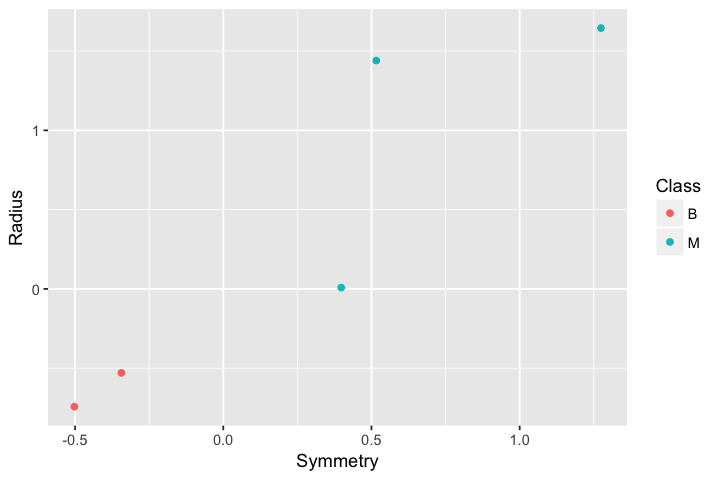

In [35]:
set.seed(2)                           # obtain the same results given the same seed number
(subDat <- sample_n(bcDat, 5) %>%     # Taking a random sample of 5 from the bcDat dataset and calling it subDat
    select(Symmetry, Radius, Class))  # Selecting only columns symmetry, radius and class

options(repr.plot.width=6, repr.plot.height=4)
subDat %>%  
  ggplot(aes(x=Symmetry, y=Radius, color = Class)) + # making a scatterplot of symmetry and radius coloured by class
  geom_point() +
  scale_x_continuous(name = "Symmetry") +            # naming the x and y labels
  scale_y_continuous(name = "Radius")

Suppose we are interested in classifying a new observation with Symmetry 0 and Radius 0.25, but unknown Class. 

In [36]:
(newDat <- subDat %>%
    add_row(Symmetry = 0, Radius = 0.25, Class = "unknown")) # Adding the new observation to the last row of subDat and calling it newDat

Symmetry,Radius,Class
0.3980190,0.008443649,M
-0.5022926,-0.742605092,B
-0.3438895,-0.529497598,B
1.2740853,1.645026441,M
0.5160132,1.440194966,M
0.0000000,0.250000000,unknown


### Part a) 
Using the subset of 5 observations above, classify this new observation (Symmetry = 0 and Radius = 0.25, unknown Class) using the `dist()` function for $k = 1$.

In [ ]:
# Your answer goes here.

### Part b) 
Using the subset of 5 observations above, classify this new observation (Symmetry = 0 and Radius = 0.25, unknown Class) using the `dist()` function for $k = 3$.

In [ ]:
# Your answer goes here.

### Part c) 
Compare your answers in part a) and b). 

> Your answer goes here. 

# Part 2 - Fruit Dataset

In the agricultural industry, cleaning, sorting, grading and packaging food products are all necessary tasks in the post-harvest process. Products are classified based on appearance, size and shape, attributes which helps determine the quality of the food. Sorting can be done by humans, but it is tedious and time consuming. Automatic sorting by machine could help this process by saving time and money. Images of the food products are captured and analysed to determine visual characteristics. The [dataset](https://www.kaggle.com/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits/notebook) contains observations of fruit described with four features 1) mass 2) width 3) height and 4) color score. The dataset "fruitDat_scaled.csv" has been scaled as part of the data preparation. Scaling will be discussed in more detail next week. 

Load the appropriate packages and "fruitDat_scaled.csv" dataset into the notebook.

In [39]:
library(readr)
fruitDat <- read_csv("data/fruitDat_scaled.csv")

Parsed with column specification:
cols(
  fruit_label = col_integer(),
  fruit_name = col_character(),
  fruit_subtype = col_character(),
  scaled_mass = col_double(),
  scaled_width = col_double(),
  scaled_height = col_double(),
  scaled_color = col_double()
)


### Question 1
Name the variable type of each column in the fruit dataset. 

In [40]:
glimpse(fruitDat)

Observations: 59
Variables: 7
$ fruit_label   <int> 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ fruit_name    <chr> "apple", "apple", "apple", "mandarin", "mandarin", "m...
$ fruit_subtype <chr> "granny_smith", "granny_smith", "granny_smith", "mand...
$ scaled_mass   <dbl> 0.52493582, 0.30682869, 0.23412631, -1.40167723, -1.4...
$ scaled_width  <dbl> 1.585084121, 1.095450806, 0.361000834, -1.107899110, ...
$ scaled_height <dbl> -0.28891657, -0.65628893, -0.36239104, -2.19925286, -...
$ scaled_color  <dbl> -2.76981970, -2.24937587, -2.11926491, 0.48295423, 0....


> Your answer goes here.

### Question 2
Change the variable "fruit_name" to a factor and save it in your dataset. 


In [41]:
# Your answer goes here.

### Question 3
Make a scatterplot of scaled color score and scaled mass grouped by fruit name. 

In [2]:
# Your answer goes here. 

### Question 4 
Suppose we have a new observation in the fruit dataset with scaled mass 0.5 and scaled colour score 0.5 labelled in black on the scatterplot below. 

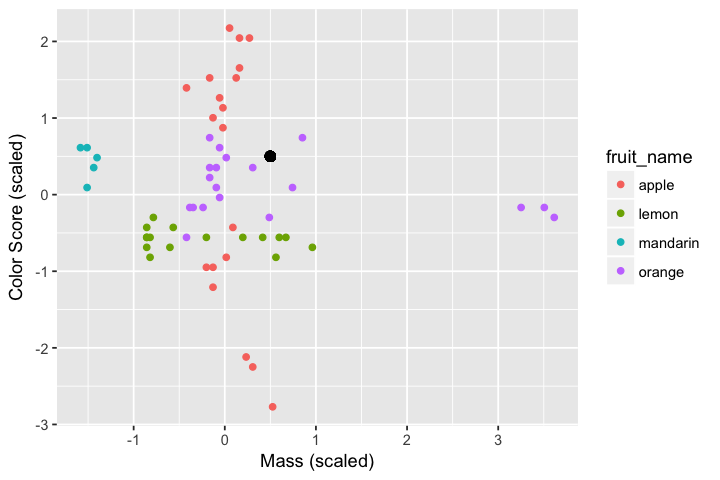

In [43]:
# hide plot
options(repr.plot.width=6, repr.plot.height=4)

fruitDat %>%  
  ggplot(aes(x=scaled_mass, y= scaled_color, color = fruit_name)) + 
  scale_x_continuous(name = "Mass (scaled)") +
  scale_y_continuous(name = "Color Score (scaled)") +
  geom_point() + geom_point(aes(x= 0.5, y= 0.5), 
               color= "black", 
               size = 2.5) 

a) Just by looking at the scatterplot, how would you classify this observation based on the 3 closest neighbours? 

> Your answer goes here.

b) Using R and the `caret` package, classify this observation based on $k=3$ nearest neighbours using attributes mass and colour score (scaled). Does your result match with what you would expect in part (a)?

In [4]:
# Your answer goes here.